# Transformada de Fourier de alguns sinais

Neste notebook avaliaremos a transformada de Fourier de alguns sinais. A TF é definida por

\begin{equation}
X(\mathrm{j} \omega)=\int^{\infty}_{-\infty}x(t)e^{-\mathrm{j}\omega t}\mathrm{d}t
\tag{1}
\end{equation}

E a TF inversa por:

\begin{equation}
x(t)=\frac{1}{2 \pi}\int^{\infty}_{-\infty}X(\mathrm{j} \omega)e^{\mathrm{j}\omega t}\mathrm{d}\omega
\tag{2}
\end{equation}

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})

### Exemplo 1

$x(t) = \delta(t)$

neste caso 

$X(\mathrm{j} \omega)=1$


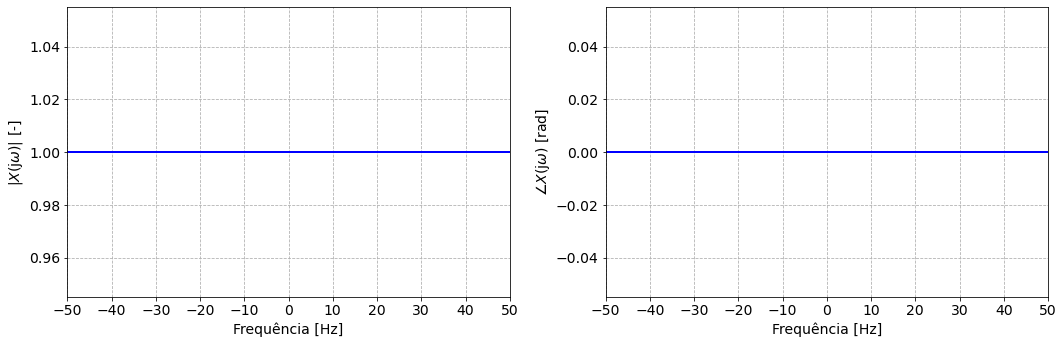

In [18]:
freq = np.linspace(-50, 50, 1000)
w = 2*np.pi*freq

Xjw = np.ones(len(w))

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(freq, np.abs(Xjw), '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|X(\mathrm{j}\omega)|$ [-]')
plt.xticks(np.arange(freq[0], freq[-1]+10, 10))
plt.xlim((freq[0], freq[-1]))

plt.subplot(1,2,2)
plt.plot(freq, np.angle(Xjw), '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$\angle X(\mathrm{j}\omega)$ [rad]')
plt.xticks(np.arange(freq[0], freq[-1]+10, 10))
plt.xlim((freq[0], freq[-1]))
plt.tight_layout()
plt.show()

### Exemplo 2

$x(t) = \mathrm{e}^{-at}u(t)$, $a>0$

neste caso 

$X(\mathrm{j} \omega)=\frac{1}{a+\mathrm{j}\omega}$

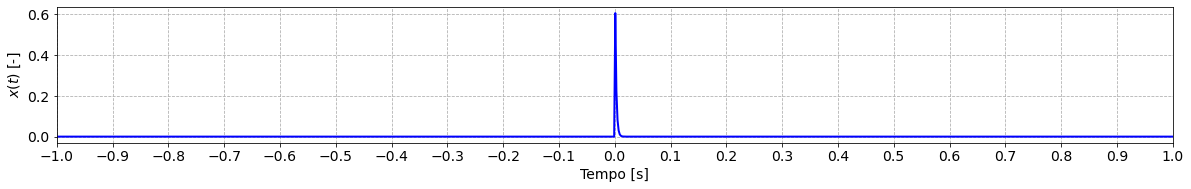

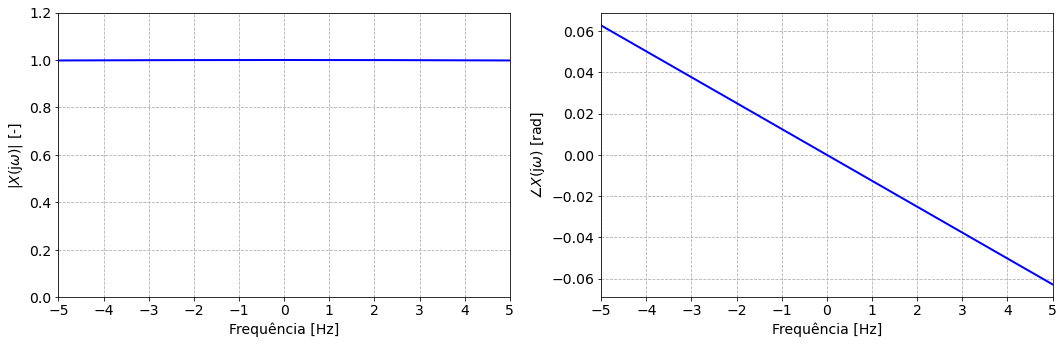

In [103]:
time = np.linspace(-1, 1, 1000)
xt = np.zeros(len(time))
a = 500
xt[time>=0] = np.exp(-a*time[time>=0])

# Time domain
plt.figure(figsize=(20, 2.5))
plt.plot(time, xt, '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x(t)$ [-]')
plt.xticks(np.arange(time[0], time[-1]+0.1, 0.1))
plt.xlim((time[0], time[-1]))

# Freq domain
freq = np.linspace(-5, 5, 10000)
w = 2*np.pi*freq

Xjw = 1/(a+1j*w)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(freq, np.abs(Xjw)/np.amax(np.abs(Xjw)), '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|X(\mathrm{j}\omega)|$ [-]')
plt.xticks(np.arange(freq[0], freq[-1]+1, 1))
plt.xlim((freq[0], freq[-1]))
plt.ylim((0, 1.2))

plt.subplot(1,2,2)
plt.plot(freq, np.angle(Xjw), '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$\angle X(\mathrm{j}\omega)$ [rad]')
plt.xticks(np.arange(freq[0], freq[-1]+1, 1))
plt.xlim((freq[0], freq[-1]))
plt.tight_layout()
plt.show()

# Exercício

(-5.0, 5.0)

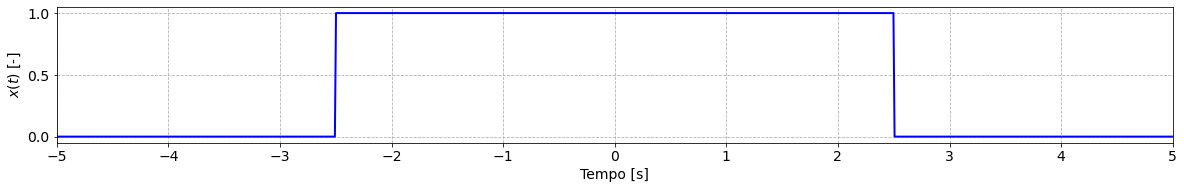

In [81]:
time = np.linspace(-5, 5, 1000)
xt = np.ones(len(time))
Tp = 5
xt[time<=-Tp/2] = 0
xt[time>=Tp/2] = 0


# Time domain
plt.figure(figsize=(20, 2.5))
plt.plot(time, xt, '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x(t)$ [-]')
plt.xticks(np.arange(time[0], time[-1]+1, 1))
plt.xlim((time[0], time[-1]))

# Dualidade

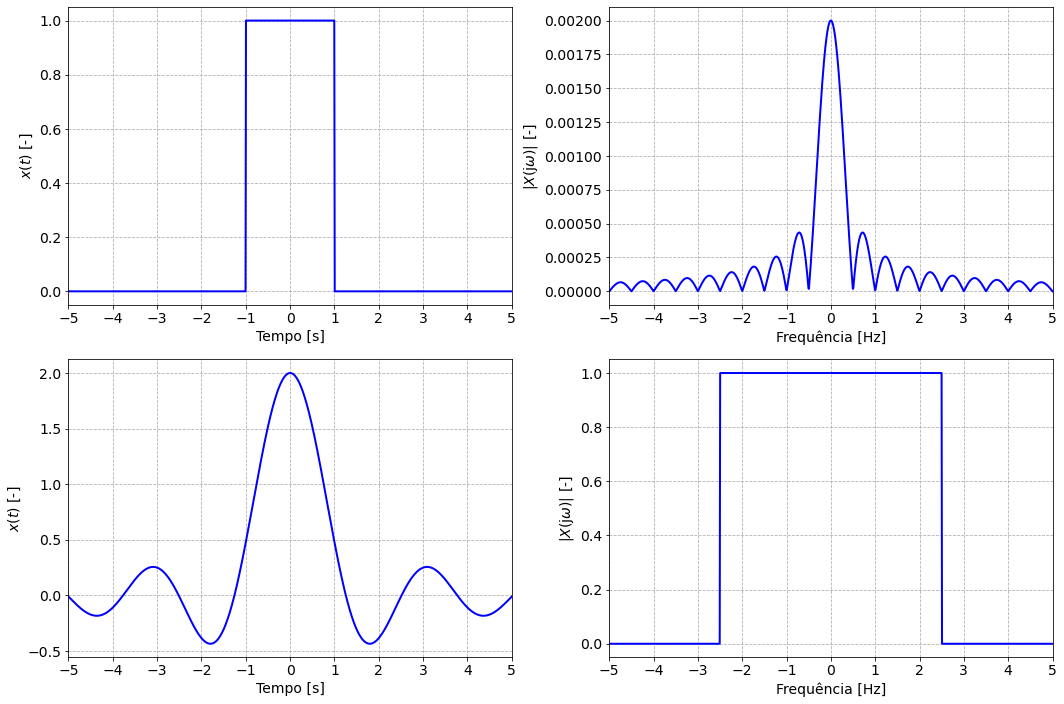

In [95]:
time = np.linspace(-5, 5, 1000)
xt1 = np.ones(len(time))
Tp = 2
xt1[time<=-Tp/2] = 0
xt1[time>=Tp/2] = 0

freq = np.linspace(-5, 5, 1000)
w=2*np.pi*freq
Xw1 = 2*np.sin(w*Tp/2)/(w*Tp/2)


w0 = 5
xt2 = 2*np.sin((w0/2)*time)/((w0/2)*time) #np.sinc(time)

Xw2 = np.ones(len(freq))
Xw2[freq<=-w0/2] = 0
Xw2[freq>=w0/2] = 0

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.plot(time, xt1, '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x(t)$ [-]')
plt.xticks(np.arange(time[0], time[-1]+1, 1))
plt.xlim((time[0], time[-1]))

plt.subplot(2,2,2)
plt.plot(freq, np.abs(Xw1)/len(Xw1), '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|X(\mathrm{j}\omega)|$ [-]')
plt.xticks(np.arange(freq[0], freq[-1]+1, 1))
plt.xlim((freq[0], freq[-1]))

plt.subplot(2,2,3)
plt.plot(time, xt2, '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x(t)$ [-]')
plt.xticks(np.arange(time[0], time[-1]+1, 1))
plt.xlim((time[0], time[-1]))

plt.subplot(2,2,4)
plt.plot(freq, np.abs(Xw2), '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|X(\mathrm{j}\omega)|$ [-]')
plt.xticks(np.arange(freq[0], freq[-1]+1, 1))
plt.xlim((freq[0], freq[-1]))
plt.tight_layout()

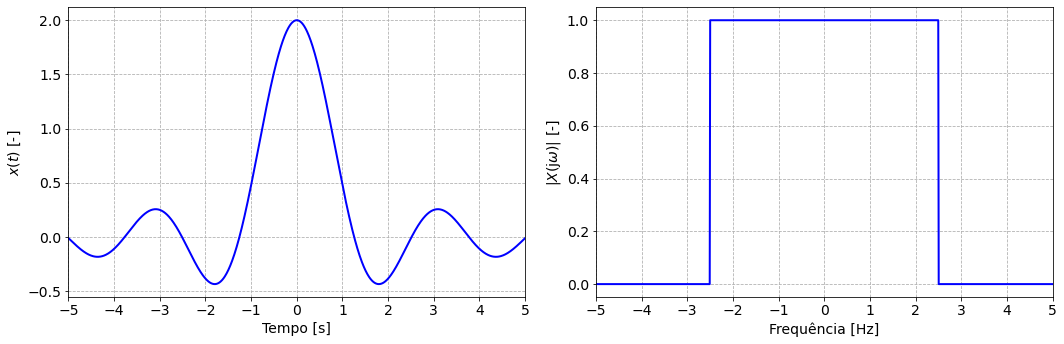

In [3]:
time = np.linspace(-5, 5, 1000)
xt1 = np.ones(len(time))
Tp = 2
xt1[time<=-Tp/2] = 0
xt1[time>=Tp/2] = 0

freq = np.linspace(-5000, 5000, 10000)
w=2*np.pi*freq
Xw1 = 2*np.sin(w*Tp/2)/(w*Tp/2)


w0 = 1000
xt2 = 2*np.sin((w0/2)*time)/((w0/2)*time) #np.sinc(time)

Xw2 = np.ones(len(freq))
Xw2[freq<=-w0/2] = 0
Xw2[freq>=w0/2] = 0

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(time, xt2, '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x(t)$ [-]')
plt.xticks(np.arange(time[0], time[-1]+1, 1))
plt.xlim((time[0], time[-1]))

plt.subplot(1,2,2)
plt.plot(freq, np.abs(Xw2), '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|X(\mathrm{j}\omega)|$ [-]')
plt.xticks(np.arange(freq[0], freq[-1]+1, 1))
plt.xlim((freq[0], freq[-1]))
plt.tight_layout()